# 1. import libraries

In [1]:
# calculate
import numpy as np
import math
import random

# load data
import pandas as pd

# visualization
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# learn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import re

# 2. 匯入資料

運用pandas 匯入資料

In [2]:
df_train=pd.read_csv("titanicTrain.csv")
df_test=pd.read_csv("titanicQuestion.csv")
df_test=df_test.dropna(axis=0, how='all').dropna(axis=1, how='all')
df_train=df_train.dropna(axis=0, how='all').dropna(axis=1, how='all')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
pclass       1000 non-null float64
survived     1000 non-null float64
name         1000 non-null object
sex          1000 non-null object
age          861 non-null float64
sibsp        1000 non-null float64
parch        1000 non-null float64
ticket       1000 non-null object
fare         1000 non-null float64
cabin        283 non-null object
embarked     998 non-null object
boat         417 non-null object
body         95 non-null float64
home.dest    742 non-null object
dtypes: float64(7), object(7)
memory usage: 117.2+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 13 columns):
pclass       309 non-null int64
name         309 non-null object
sex          309 non-null object
age          185 non-null float64
sibsp        309 non-null int64
parch        309 non-null int64
ticket       309 non-null object
fare         308 non-null float64
cabin        12 non-null object
embarked     309 non-null object
boat         69 non-null object
body         26 non-null float64
home.dest    3 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 33.8+ KB


# 3. 觀察資料

In [5]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1000.000000,1000.000000,861.000000,1000.000000,1000.0000,1000.000000,95.000000
mean,2.077000,0.423000,31.084204,0.449000,0.3800,39.274912,157.494737
std,0.847224,0.494283,14.398285,0.803769,0.8014,57.463782,91.685154
min,1.000000,0.000000,0.166700,0.000000,0.0000,0.000000,9.000000
25%,1.000000,0.000000,22.000000,0.000000,0.0000,8.050000,77.000000
50%,2.000000,0.000000,29.000000,0.000000,0.0000,20.250000,149.000000
75%,3.000000,1.000000,40.000000,1.000000,0.0000,41.579200,240.500000
max,3.000000,1.000000,80.000000,5.000000,6.0000,512.329200,322.000000


### (1) 觀察是否有得救的人數

([<matplotlib.axis.XTick at 0x1cdb7fe01d0>,
 <a list of 2 Text xticklabel objects>)

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


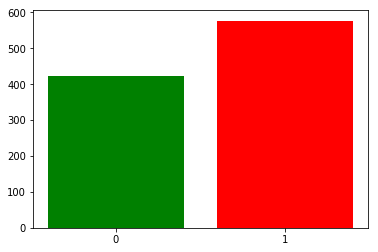

In [6]:
all_survive=len(df_train[df_train["survived"]==1])
all_dead=len(df_train[df_train["survived"]==0])
x=np.arange(2)
plt.bar(x,[all_survive,all_dead],align='center',color="g" "r")
plt.xticks(x, ("0","1"))

可以看出獲救的人數占超過一半

### (2) 年齡、性別和獲救的關係

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


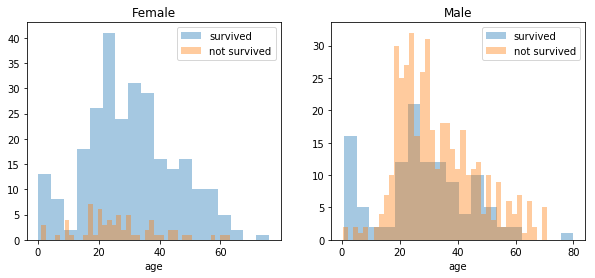

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_train[df_train['sex']=='female']
men = df_train[df_train['sex']=='male']
ax = sns.distplot(women[women['survived']==1]["age"].dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0]["age"].dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1]["age"].dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0]["age"].dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

由圖可以看出，女生在18~60歲的時候有較高的存活率、在18~30歲有較高的死亡率；而男生在20~60歲的時候有較高的存活率、在18~70歲有較高的死亡率(比女生高)

有趣的是，不管男生女生，嬰孩和老人獲救的比率都很高

### (3) 不同港口、性別、pclass對存活率的影響

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


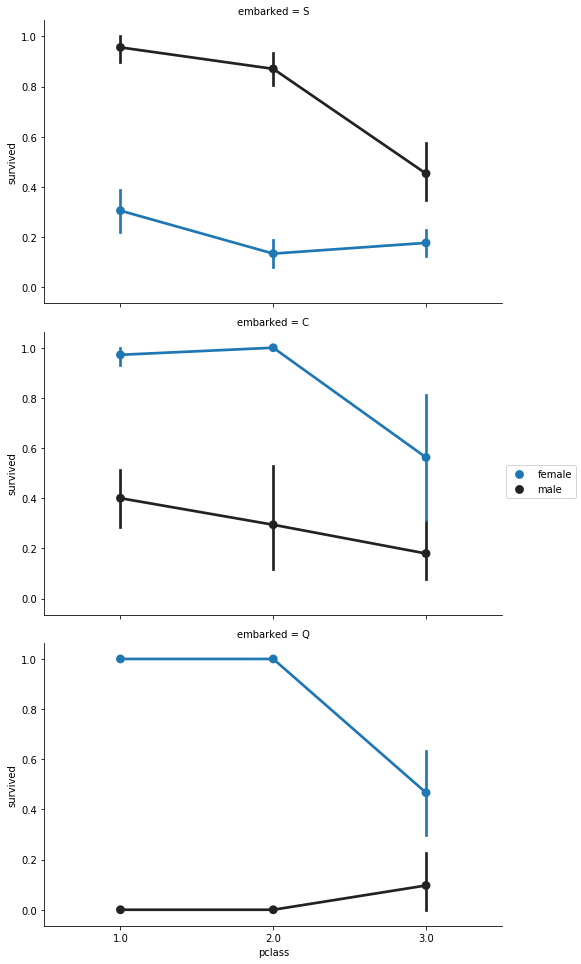

In [8]:
FacetGrid = sns.FacetGrid(df_train, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

雖然感覺是亂抓幾個，但結果出來還蠻有規律的，可以看出，在S港上船的，男生存活的機率比女生高，反之亦然。

在pclass3中的人，普遍存活率都不高


# 4. 先進行參數的有效化

發現有缺的是age、cabin、embarked、boat、body、home.dest，先從缺的比較少的去做(有先嘗試過先做cabin，但是誤差很大)

### (1) embarked

可以觀察到，含船艙位置有密切的關係

In [9]:
df_train["embarked"].describe()

count     998
unique      3
top         S
freq      703
Name: embarked, dtype: object

In [10]:
for index,ele in enumerate(df_train["embarked"]):
    try:
        float(ele)
        print(df_train["cabin"][index])
    except:
        pass

B28
B28


In [11]:
df_train[df_train["cabin"]=="B28"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [12]:
df_train[df_train["home.dest"]=="Cincinatti, OH"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [13]:
df_train[df_train["ticket"]=="113572"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


本來想說用cabin、ticket、hom.dest看看能不能找出規律，但好像無法==

於是只好指定他們都是最多人登船的港口

In [14]:
dataset=[df_train,df_test]
for data in dataset:
    for index,ele in enumerate(data["embarked"]):
        try:
            float(ele)
            data["embarked"][index]=list(data["embarked"].describe())[2]
        except:
            pass

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
pclass       1000 non-null float64
survived     1000 non-null float64
name         1000 non-null object
sex          1000 non-null object
age          861 non-null float64
sibsp        1000 non-null float64
parch        1000 non-null float64
ticket       1000 non-null object
fare         1000 non-null float64
cabin        283 non-null object
embarked     1000 non-null object
boat         417 non-null object
body         95 non-null float64
home.dest    742 non-null object
dtypes: float64(7), object(7)
memory usage: 157.2+ KB


### (2) cabin

由資料發現，坐哪一個船艙和船票有很大的關聯

票價對應船艙的關係，如果沒對應到，找最接近的；如果找到兩個以上，隨機選取

In [16]:
import numpy as np
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [17]:
dataset=[df_train,df_test]
for data in dataset:
    df_interesting=data.ix[:,["cabin","fare"]].dropna(axis=0, how='any')
    allfare=list(set(df_interesting["fare"]))
    dic={}
    for ele in allfare:
        temp=list(df_interesting[df_interesting["fare"]==ele]["cabin"])
        dic[ele]=temp
    dic_key=dic.keys()
    dic_key=list(dic_key)
    dic_key=np.asarray(dic_key)

    for index,ele in enumerate(data["fare"]):
        if type(data["cabin"][index])==float:
            nearest=find_nearest(dic_key,ele)
            guess=random.choice(dic[nearest])
            data["cabin"][index]=guess

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
pclass       1000 non-null float64
survived     1000 non-null float64
name         1000 non-null object
sex          1000 non-null object
age          861 non-null float64
sibsp        1000 non-null float64
parch        1000 non-null float64
ticket       1000 non-null object
fare         1000 non-null float64
cabin        1000 non-null object
embarked     1000 non-null object
boat         417 non-null object
body         95 non-null float64
home.dest    742 non-null object
dtypes: float64(7), object(7)
memory usage: 157.2+ KB


### (3) body、home.dest

太多資料空缺，果斷放棄

In [19]:
dataset=[df_train,df_test]
for data in dataset:
    del data["body"]
    del data["home.dest"]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
pclass      1000 non-null float64
survived    1000 non-null float64
name        1000 non-null object
sex         1000 non-null object
age         861 non-null float64
sibsp       1000 non-null float64
parch       1000 non-null float64
ticket      1000 non-null object
fare        1000 non-null float64
cabin       1000 non-null object
embarked    1000 non-null object
boat        417 non-null object
dtypes: float64(6), object(6)
memory usage: 141.6+ KB


### (4) age

歲數有點分散，運用平均和標準差，隨機選取在一個標準差之內的資料

In [20]:
dataset=[df_train,df_test]
for data in dataset:
    mean = data["age"].mean()
    std = data["age"].std()
    is_null = data["age"].isnull().sum()

    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    age_slice = data["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["age"] = age_slice
    data["age"] = data["age"].astype(int)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
pclass      1000 non-null float64
survived    1000 non-null float64
name        1000 non-null object
sex         1000 non-null object
age         1000 non-null int32
sibsp       1000 non-null float64
parch       1000 non-null float64
ticket      1000 non-null object
fare        1000 non-null float64
cabin       1000 non-null object
embarked    1000 non-null object
boat        417 non-null object
dtypes: float64(5), int32(1), object(6)
memory usage: 137.7+ KB


### (4) boat

把沒有資料的填零

In [22]:
dataset=[df_train,df_test]
for data in dataset:
    data["boat"]=data["boat"].fillna(0)
    data["fare"]=data["fare"].fillna(0)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
pclass      1000 non-null float64
survived    1000 non-null float64
name        1000 non-null object
sex         1000 non-null object
age         1000 non-null int32
sibsp       1000 non-null float64
parch       1000 non-null float64
ticket      1000 non-null object
fare        1000 non-null float64
cabin       1000 non-null object
embarked    1000 non-null object
boat        1000 non-null object
dtypes: float64(5), int32(1), object(6)
memory usage: 137.7+ KB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 11 columns):
pclass      309 non-null int64
name        309 non-null object
sex         309 non-null object
age         309 non-null int32
sibsp       309 non-null int64
parch       309 non-null int64
ticket      309 non-null object
fare        309 non-null float64
cabin       309 non-null object
embarked    309 non-null object
boat        309 non-null object
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 37.8+ KB


# 5. 數值化

把數值全部都數值化，方便輸入到machine learning中

### (1) float 的資料

把原本是float形式的資料轉成int

In [41]:
dataset=[df_train,df_test]
for data in dataset:
    data["pclass"]=data["pclass"].astype(int)
    data["sibsp"]=data["sibsp"].astype(int)
    data["parch"]=data["parch"].astype(int)
df_train["survived"]=df_train["survived"].astype(int)

### (2) 性別

假設男生為0，女生為1

In [26]:
dataset=[df_train,df_test]
genders = {"male": 0, "female": 1}
for data in dataset:
    data['sex'] = data['sex'].map(genders)

### (3) 登船港口

假設S為0，C為1，Q為2

In [27]:
embark = {"S": 0, "C": 1,"Q":2}
dataset=[df_train,df_test]
for data in dataset:
    data['embarked'] = data['embarked'].map(embark)

### (4) not_alone

船票告訴我們誰和誰可能一起來玩，轉換成not_alone 輸出

In [28]:
dataset=[df_train,df_test]
for data in dataset:
    ticket=list(data["ticket"])
    def check(x):
        if ticket.count(x)>1:
            return 1
        else:
            return 0

    data["not_alone"]=data["ticket"].apply(check)
    data=data.drop(["ticket"],axis=1)

### (5) cabin

把cabin的文字轉成從數字

In [29]:
dataset=[df_train,df_test]
for data in dataset:
    cabin=list(set(data["cabin"]))
    cabin_value=np.arange(len(cabin))
    cabin_dic= {key: value for (key, value) in zip(cabin,cabin_value)}
    data['cabin'] = data['cabin'].map(cabin_dic)

### (6) boat

把boat的文字轉成從數字

In [30]:
dataset=[df_train,df_test]
for data in dataset:
    boat=list(set(data["boat"]))
    boat_value=np.arange(1,len(boat)+1)
    boat_dic= {key: value for (key, value) in zip(boat,boat_value)}
    data['boat'] = data['boat'].map(boat_dic)

### (7) age

分群，希望每一群人數差不多

In [31]:
dataset=[df_train,df_test]
for data in dataset:
    data['age'] = data['age'].astype(int)
    data.loc[ data['age'] <= 11, 'age'] = 0
    data.loc[(data['age'] > 11) & (data['age'] <= 18), 'age'] = 1
    data.loc[(data['age'] > 18) & (data['age'] <= 22), 'age'] = 2
    data.loc[(data['age'] > 22) & (data['age'] <= 27), 'age'] = 3
    data.loc[(data['age'] > 27) & (data['age'] <= 33), 'age'] = 4
    data.loc[(data['age'] > 33) & (data['age'] <= 40), 'age'] = 5
    data.loc[(data['age'] > 40) & (data['age'] <= 66), 'age'] = 6
    data.loc[ data['age'] > 66, 'age'] = 6

In [32]:
df_train['age'].value_counts()

6    221
4    173
3    166
5    163
2    119
1     97
0     61
Name: age, dtype: int64

有滿足預期的標準

### (8) 船票費用

跟年齡一樣

In [33]:
dataset=[df_train,df_test]
for data in dataset: 
    data.loc[(data['fare'] > 7.91) & (data['fare'] <= 14.454), 'fare'] = 1
    data.loc[(data['fare'] > 14.454) & (data['fare'] <= 31), 'fare']   = 2
    data.loc[(data['fare'] > 31) & (data['fare'] <= 99), 'fare']   = 3
    data.loc[(data['fare'] > 99) & (data['fare'] <= 250), 'fare']   = 4
    data.loc[ data['fare'] > 250, 'fare'] = 5
    data['fare'] = data['fare'].astype(int)

In [34]:
df_train['fare'].value_counts()

2    254
3    228
1    218
7    188
4     68
5     18
0     16
6     10
Name: fare, dtype: int64

有滿足預期的標準

### (9) 名字

要把名字數值化有點難度，以兩個方面來操作

首先先抓取名字的title

In [35]:
dataset=[df_train,df_test]
for data in dataset: 
    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    data['Title'] = data["name"].str.extract(' ([A-Za-z]+)\.', expand=False)

    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

    data['Title'] = data['Title'].map(titles)

    data['Title'] = data['Title'].fillna(0)

再來，以姓氏為基礎，看看家庭大小

In [36]:
dataset=[df_train,df_test]
for data in dataset:     
    family_list=[]
    for ele in data["name"]:
        temp=ele.split(",")
        family_list.append(temp[0])
    def size(x):
        temp=x.split(",")
        return (family_list.count(temp[0])-1)

    data['familysize'] = data['name'].apply(size)

In [37]:
dataset=[df_train,df_test]
for data in dataset:
    del data["name"]
    del data["ticket"]

In [38]:
df_train

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,not_alone,Title,familysize
0,1,1.0,1,4,0,0,4,125,0,2,1,2,1
1,1,1.0,0,0,1,2,4,173,0,4,1,4,3
2,1,0.0,1,0,1,2,4,173,0,1,1,2,3
3,1,0.0,0,4,1,2,4,173,0,1,1,1,3
4,1,0.0,1,3,1,2,4,173,0,1,1,3,3
5,1,1.0,0,6,0,0,2,81,0,5,0,1,0
6,1,1.0,1,6,1,0,3,36,0,8,1,2,1
7,1,0.0,0,5,0,0,0,137,0,1,0,1,1
8,1,1.0,1,6,2,0,3,128,0,13,1,3,0
9,1,0.0,0,6,0,0,3,97,1,1,0,1,0


In [39]:
df_test

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,not_alone,Title,familysize
0,3,0,4,0,0,7,2,2,1,0,1,0
1,3,1,2,2,0,2,1,2,4,1,2,2
2,3,1,1,2,0,2,1,2,4,1,2,2
3,3,0,2,2,0,2,1,2,4,1,1,2
4,3,1,4,0,0,7,2,2,6,0,2,0
5,3,0,3,0,0,2,4,2,1,1,1,0
6,3,1,1,0,0,7,2,2,6,0,2,0
7,3,1,1,0,0,1,0,2,1,0,2,1
8,3,1,5,0,0,7,2,2,1,0,2,1
9,3,0,1,0,0,7,2,2,1,0,1,0


# 6. 機器學習

匯入資料

In [43]:
X_train = df_train.drop("survived", axis=1)
Y_train = df_train["survived"]
X_test  = df_test.copy()

建model，以下百分比為預測train當中的正確度

### (1) SGD

In [46]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred_SGD = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")
acctr_SGD=round(acc_sgd,2,)

96.9 %


In [47]:
Y_pred_SGD

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### (2) Randon forest

In [85]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred_RandomForest = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
acctr_RandomForest=round(acc_random_forest,2,)

99.7 %


In [86]:
Y_pred_RandomForest

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### (3) Logistic Regrssion

In [88]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred_LogisticRegrssion = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")
acctr_LogisticRegrssion=round(acc_log,2,)

96.1 %


In [52]:
Y_pred_LogisticRegrssion 

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### (4) KNN

In [53]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred_KNN = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")
acctr_KNN=round(acc_knn,2,)

96.5 %


In [54]:
Y_pred_KNN

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### (5) Gaussian Naive Bayes

In [55]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred_GaussianNaiveBayes = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")
acctr_GaussianNaiveBayes=round(acc_gaussian,2,)

94.4 %


In [56]:
Y_pred_GaussianNaiveBayes

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

### (6) Perceptron

In [57]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred_Perceptron = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")
acctr_perceptron=round(acc_perceptron,2,)

96.9 %


In [58]:
Y_pred_Perceptron

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### (7) Linear SVC

In [59]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred_LinearSVC = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")
acctr_LinearSVC=round(acc_linear_svc,2,)

95.6 %


In [60]:
Y_pred_LinearSVC

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### (8) Decision Tree

In [61]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_DecisionTree = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")
acctr_DecisionTree=round(acc_decision_tree,2,)

99.7 %


In [62]:
Y_pred_DecisionTree

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

# 7. 後記

感謝koggle上面的示範，讓我學到了很多，在這項作業中，我認為最麻煩的是數據處裡==，需要一筆一筆地找關聯性，然後一直嘗試，才能輸入到機器學習的model中，因為時間的問題，model的部分都是無腦代入，希望往後可以弄懂裡面在幹嘛

不過發現一個小小的東西，有些model再重新計算的時候，%數會變，但是Y_Pred不會變，是為什麼呢？

# 8. 對答案

答案

In [105]:
ans=pd.read_excel("ans.xlsx")
ans=np.array(ans.survived)
def loss(a,b):
    temp=((a-b)*(a-b)).sum()
    return (1-temp/309)

### (1) SGD

In [106]:
acc_ts = round(loss(Y_pred_SGD,ans) * 100, 2)
print(round(acc_ts,2,), "%")

95.79 %


### (2) Randon forest

In [107]:
acc_ts = round(loss(Y_pred_RandomForest,ans) * 100, 2)
print(round(acc_ts,2,), "%")

96.44 %


### (3) Logistic Regrssion

In [89]:
acc_ts = round(loss(Y_pred_LogisticRegrssion,ans) * 100, 2)
print(round(acc_ts,2,), "%")

92.88 %


### (4) KNN

In [90]:
acc_ts = round(loss(Y_pred_KNN,ans) * 100, 2)
print(round(acc_ts,2,), "%")

92.23 %


### (5) Gaussian Naive Bayes

In [91]:
acc_ts = round(loss(Y_pred_GaussianNaiveBayes,ans) * 100, 2)
print(round(acc_ts,2,), "%")

89.64 %


### (6) Perceptron

In [92]:
acc_ts = round(loss(Y_pred_Perceptron,ans) * 100, 2)
print(round(acc_ts,2,), "%")

94.82 %


### (7) Linear SVC

In [93]:
acc_ts = round(loss(Y_pred_LinearSVC,ans) * 100, 2)
print(round(acc_ts,2,), "%")

90.61 %


### (8) Decision Tree

In [94]:
acc_ts = round(loss(Y_pred_DecisionTree,ans) * 100, 2)
print(round(acc_ts,2,), "%")

96.44 %
